<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/Intentos_Red_Neuronal_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¬øQu√© es load_digits?

Es un conjunto de im√°genes de d√≠gitos escritos a mano (del 0 al 9), donde cada imagen es de tama√±o 8x8 p√≠xeles (64 caracter√≠sticas en total por imagen).

# C√≥mo cargarlo:

In [ ]:
from sklearn.datasets import load_digits

# Cargar los datos
digits = load_digits()

# Entradas (im√°genes aplanadas)
X = digits.data

# Salidas (etiquetas del 0 al 9)
y = digits.target

¬øQu√© significa cada par√°metro?

In [ ]:
load_digits(n_class=10, return_X_y=False, as_frame=False)

#    n_class=10 ------> N√∫mero de clases a cargar (por defecto 10, para d√≠gitos del 0 al 9).
#                       Puedes usar menos si quieres hacerlo m√°s simple, por ejemplo, n_class=3
#                       cargar√° solo d√≠gitos del 0 al 2.
#
#   return_X_y -------> Si True, retorna directamente (X, y) en lugar de un objeto tipo Bunch.
#
#   as_frame ---------> Si True, los datos se devuelven como un DataFrame de pandas.

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Ejemplo completo con red neuronal:

Aqu√≠ te va un ejemplo usando MLPClassifier (una red neuronal multicapa de Scikit-learn):

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
X, y = load_digits(return_X_y=True)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

# Entrenar
mlp.fit(X_train, y_train)

# Predecir
y_pred = mlp.predict(X_test)

# Evaluar
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  2  0  0  1]
 [ 1  0  0  0  0  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  1  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  0  0  0  1 57]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.96      0.96      0.96        53
           7       1.00      0.98      0.99        55
           8       0.93      0.91      0.92        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       

Vamos a adaptar el uso del dataset load_digits para usarlo con Keras (TensorFlow) y adem√°s vamos a visualizar algunas im√°genes del conjunto de datos y c√≥mo funciona la red.

# ‚úÖ Paso 1: Cargar y visualizar los datos

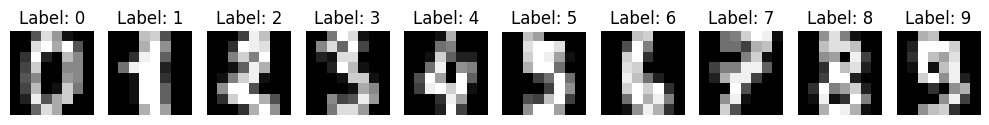

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el dataset
digits = load_digits()
X = digits.images  # im√°genes 8x8
y = digits.target  # etiquetas (d√≠gitos del 0 al 9)

# Mostrar los primeros 10 d√≠gitos
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


# ‚úÖ Paso 2: Preparar los datos para Keras

Keras espera que los datos est√©n en forma de matrices 2D o 3D (para im√°genes).

Convertimos las im√°genes 8x8 a matrices de entrada.

 Tambi√©n convertimos las etiquetas a one-hot encoding.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalizar valores (0-16) a (0-1)
X = X / 16.0

# Cambiar forma a (n_samples, 8, 8, 1) para usar CNN o (n_samples, 64) para MLP
X = X.reshape((X.shape[0], -1))  # MLP: 64 entradas

# One-hot encoding de las etiquetas
y_cat = to_categorical(y, num_classes=10)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)


# ‚úÖ Paso 3: Crear y entrenar la red neuronal con Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la red
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 11ms/step - accuracy: 0.1643 - loss: 2.2673 - val_accuracy: 0.3452 - val_loss: 1.9395
Epoch 2/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.4448 - loss: 1.8255 - val_accuracy: 0.6706 - val_loss: 1.4860
Epoch 3/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.7384 - loss: 1.3457 - val_accuracy: 0.7937 - val_loss: 1.0225
Epoch 4/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.8522 - loss: 0.9058 - val_accuracy: 0.8373 - val_loss: 0.7483
Epoch 5/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8771 - loss: 0.6403 - val_accuracy: 0.8730 - val_loss: 0.5817
Epoch 6/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9123 - loss: 0.4722 - val_accuracy: 0.8690 - val_loss: 0.4937
Epo

# ‚úÖ Paso 4: Graficar el entrenamiento

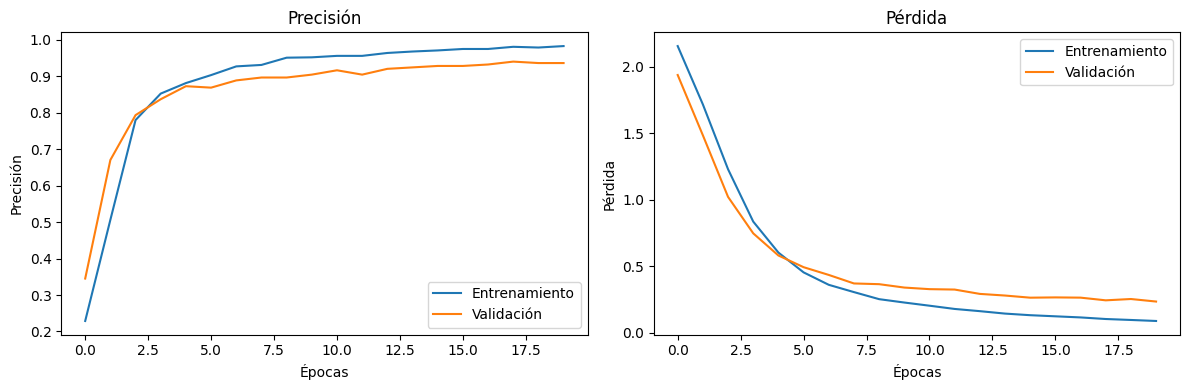

In [ ]:
# Graficar precisi√≥n y p√©rdida
plt.figure(figsize=(12, 4))

# Precisi√≥n
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n')
plt.title('Precisi√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Precisi√≥n')
plt.legend()

# P√©rdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validaci√≥n')
plt.title('P√©rdida')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()

plt.tight_layout()
plt.show()


# ‚úÖ Paso 5: Evaluar el modelo

In [ ]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisi√≥n en datos de prueba: {test_acc:.4f}')


Precisi√≥n en datos de prueba: 0.9556


Mostrar las predicciones visualmente con colores es una excelente forma de ver c√≥mo est√° funcionando tu red neuronal. Vamos a graficar algunas im√°genes del conjunto de prueba junto con:

* Su etiqueta real

* Su predicci√≥n

Y usaremos colores para resaltar si la predicci√≥n fue correcta (verde) o incorrecta (rojo)

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 


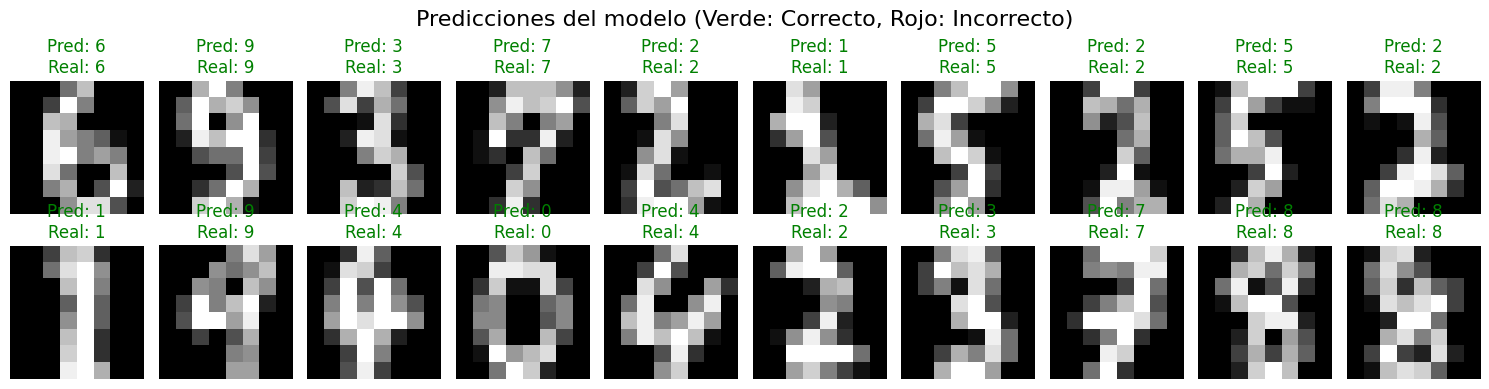

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Primero, reestructuramos las im√°genes para graficarlas
X_test_imgs = X_test.reshape(-1, 8, 8)  # Volvemos a 8x8 para visualizar

# Realizamos predicciones
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Mostrar primeras 20 im√°genes con predicci√≥n y color
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Predicciones del modelo (Verde: Correcto, Rojo: Incorrecto)', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_imgs[i], cmap='gray')
    pred_label = y_pred_labels[i]
    true_label = y_true_labels[i]

    # T√≠tulo con color
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f'Pred: {pred_label}\nReal: {true_label}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()


La matriz de confusi√≥n visual es una herramienta para evaluar el rendimiento de un modelo de clasificaci√≥n, como tu red neuronal. Es como una tabla que compara las etiquetas reales con las predicciones del modelo, y se puede mostrar como una imagen de calor (heatmap) para que sea m√°s f√°cil de entender visualmente.



¬øC√≥mo se lee?

Supongamos que tienes 10 clases (los d√≠gitos del 0 al 9):

* Las filas son las clases reales (etiquetas verdaderas).

* Las columnas son las clases predichas por el modelo.

* Cada celda muestra cu√°ntas veces el modelo predijo cierta clase cuando en realidad era otra.

Si el modelo fuera perfecto, solo ver√≠as valores grandes en la diagonal principal (de arriba a la izquierda hacia abajo a la derecha).


¬øPara qu√© sirve?

Te permite ver qu√© clases se confunden entre s√≠. Por ejemplo, si tu modelo confunde el 8 con el 3, lo ver√°s claramente.

Puedes usarla para decidir si necesitas m√°s datos, ajustar la red, o cambiar la arquitectura.

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step 


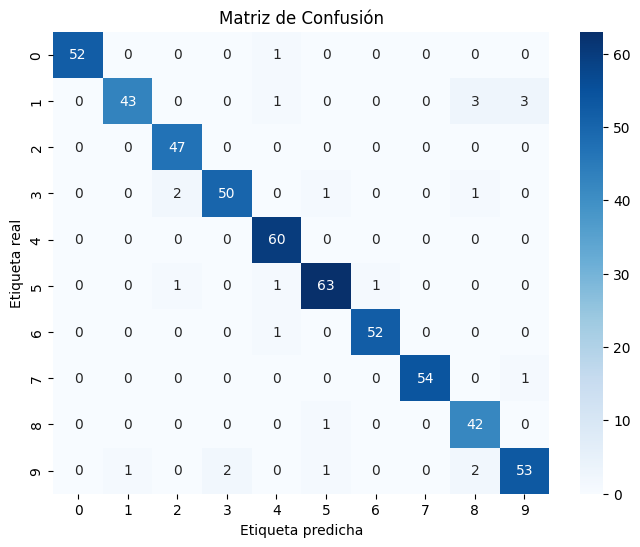

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener etiquetas reales y predichas
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Crear la matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred_labels)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusi√≥n')
plt.show()


¬øC√≥mo interpretar esta tabla?

1. Diagonal principal = aciertos

* * Por ejemplo, la celda (9,9) tiene 53 ‚Üí eso significa que 53 im√°genes que eran un 9 fueron predichas correctamente como 9.

2. Fuera de la diagonal = errores

* * Por ejemplo, la celda (5,3) tiene 1 ‚Üí eso quiere decir que una imagen que era un 5 fue mal clasificada como un 3.

3. Errores m√°s comunes

* * Puedes ver si hay n√∫meros que el modelo confunde seguido.

* * En el ejemplo, el modelo confundi√≥ algunas veces el 8 como un 5, y el 1 como un 8. Esto puede tener sentido si las formas escritas a mano se parecen mucho.

4.  Filas con errores = clases dif√≠ciles

* * Si una fila tiene muchos valores fuera de la diagonal, esa clase puede ser dif√≠cil de distinguir.

* * En este ejemplo, el d√≠gito 1 tiene m√°s errores que el 0, por ejemplo.

¬øQu√© hacer con esta info?
* Aumentar datos de las clases que el modelo confunde m√°s.

* Aplicar data augmentation para que el modelo vea variantes de las im√°genes.

* Usar una arquitectura m√°s potente, como una red convolucional (CNN) que entiende mejor im√°genes.

Vamos a mostrar solo los errores del modelo, es decir, aquellas im√°genes del conjunto de prueba donde la predicci√≥n no coincidi√≥ con la etiqueta real.

Se mostrara:

* La imagen que el modelo fall√≥

* La etiqueta real

* La etiqueta predicha

* Y usaremos colores rojos para el texto, indicando el error

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 


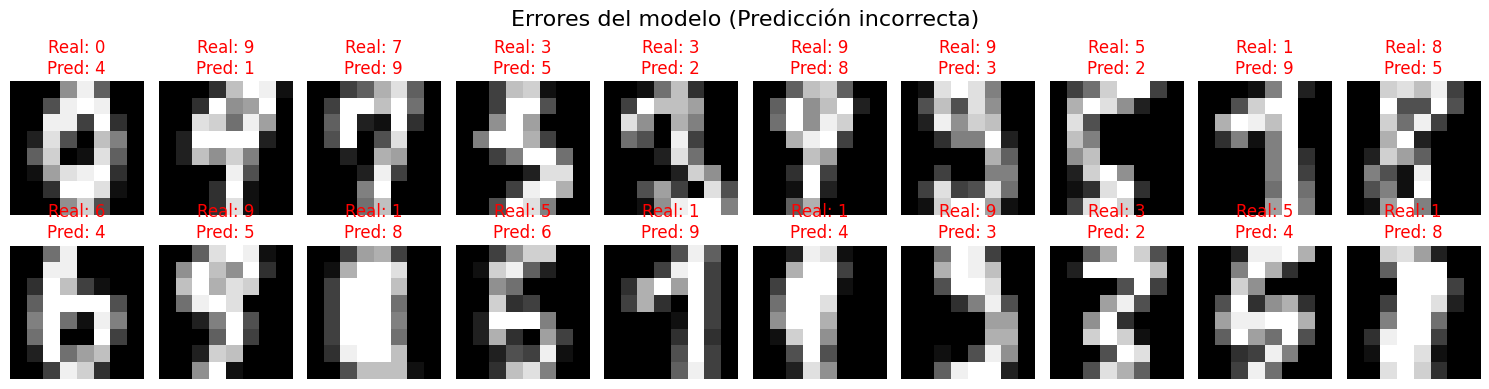

In [ ]:
# C√≥digo para visualizar solo los errores del modelo:
import numpy as np
import matplotlib.pyplot as plt

# Predecir y convertir a etiquetas
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Identificar los √≠ndices donde se cometieron errores
errores_idx = np.where(y_pred_labels != y_true_labels)[0]

# Mostrar hasta 20 errores
n_errores_a_mostrar = min(20, len(errores_idx))
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Errores del modelo (Predicci√≥n incorrecta)', fontsize=16)

# Reconvertimos X_test para visualizar (8x8)
X_test_imgs = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat[:n_errores_a_mostrar]):
    idx = errores_idx[i]
    ax.imshow(X_test_imgs[idx], cmap='gray')
    ax.set_title(f'Real: {y_true_labels[idx]}\nPred: {y_pred_labels[idx]}', color='red')
    ax.axis('off')

plt.tight_layout()
plt.show()


¬øQu√© ver√°s?
* Una fila de im√°genes donde el modelo se equivoc√≥.

* Encima de cada imagen aparecer√°:

* * Real: la etiqueta verdadera

* * Pred: lo que la red neuronal predijo

* Todo en rojo para indicar que fue un error

Esto te ayuda a:

* Entender por qu√© el modelo falla

* Ver si algunas im√°genes son ambiguas o confusas

* Detectar si el modelo necesita m√°s entrenamiento, mejores datos o otra arquitectura

Una CNN entiende mejor las formas espaciales (como los bordes, l√≠neas, curvas), lo cual es ideal para im√°genes. A diferencia del MLP que trata las im√°genes como un vector plano, la CNN mantiene la estructura 2D de la imagen.

# ‚úÖ Paso 1: Preparar los datos para la CNN

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Cargar datos
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images  # (n_samples, 8, 8)
y = digits.target

# Normalizar: los valores van de 0 a 16
X = X / 16.0

# Cambiar forma a (n_samples, 8, 8, 1) para que lo acepte la CNN
X = X.reshape((-1, 8, 8, 1))

# One-hot encoding para etiquetas
y_cat = to_categorical(y, 10)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)


# ‚úÖ Paso 2: Crear y entrenar la CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear modelo CNN
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history_cnn = cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 13ms/step - accuracy: 0.2804 - loss: 2.1638 - val_accuracy: 0.7540 - val_loss: 1.7295
Epoch 2/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.7793 - loss: 1.5386 - val_accuracy: 0.8492 - val_loss: 0.9337
Epoch 3/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.8412 - loss: 0.8248 - val_accuracy: 0.8968 - val_loss: 0.5178
Epoch 4/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9038 - loss: 0.4614 - val_accuracy: 0.9206 - val_loss: 0.3667
Epoch 5/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9456 - loss: 0.2974 - val_accuracy: 0.9246 - val_loss: 0.2878
Epoch 6/20
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.9374 - loss: 0.2516 - val_accuracy: 0.9167 - val_loss: 0.2548
Epoch 7/20
32/

# ‚úÖ Paso 3: Evaluar y comparar resultados

In [ ]:
# Evaluar en el conjunto de prueba
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test, verbose=0)
print(f'Precisi√≥n de la CNN en datos de prueba: {test_acc_cnn:.4f}')


Precisi√≥n de la CNN en datos de prueba: 0.9704


# ‚úÖ Paso 4: Visualizar errores de la CNN

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step


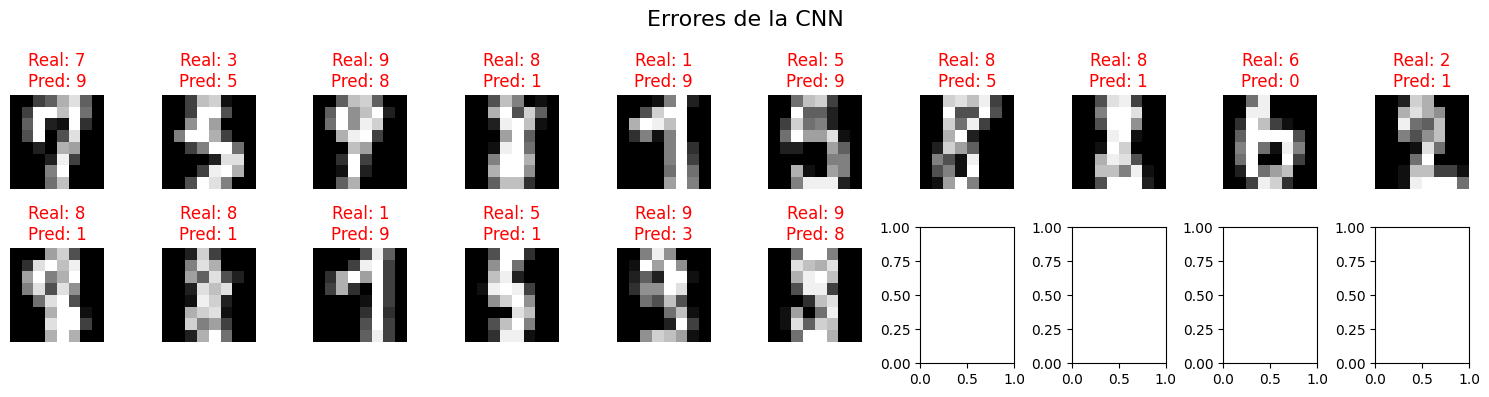

In [ ]:
# Obtener predicciones
y_pred_cnn = cnn.predict(X_test)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_labels_cnn = np.argmax(y_test, axis=1)

# Encontrar errores
errores_idx_cnn = np.where(y_pred_labels_cnn != y_true_labels_cnn)[0]

# Mostrar errores (hasta 20)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Errores de la CNN', fontsize=16)

for i, ax in enumerate(axes.flat[:min(20, len(errores_idx_cnn))]):
    idx = errores_idx_cnn[i]
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f'Real: {y_true_labels_cnn[idx]}\nPred: {y_pred_labels_cnn[idx]}', color='red')
    ax.axis('off')

plt.tight_layout()
plt.show()


Vamos a comparar visualmente las dos matrices de confusi√≥n: la de la MLP (red neuronal densa) y la de la CNN. As√≠ podr√°s ver claramente:

* Cu√°les d√≠gitos se confund√≠an antes y ya no se confunden

* Si la CNN reduce los errores

* En qu√© casos sigue teniendo problemas

# ‚úÖ Paso 1: Matriz de confusi√≥n para la MLP

(ya la teniamos)

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 


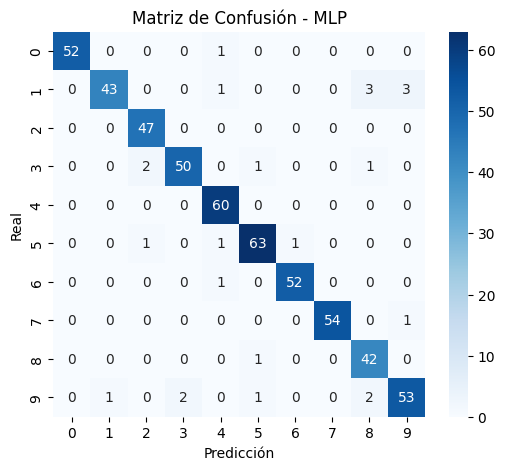

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Para la MLP
y_true_mlp = np.argmax(y_test, axis=1)
y_pred_mlp = np.argmax(model.predict(X_test.reshape(-1, 64)), axis=1)  # <- recuerda que X_test aqu√≠ es (n, 64)

cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n - MLP')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()


# ‚úÖ Paso 2: Matriz de confusi√≥n para la CNN

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 


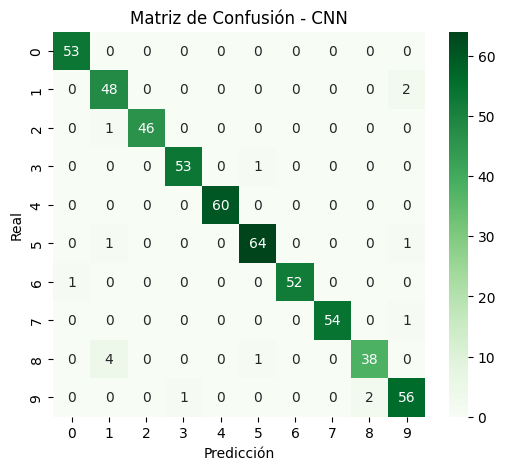

In [ ]:
# Para la CNN
y_true_cnn = np.argmax(y_test, axis=1)
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusi√≥n - CNN')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()


# üîç Interpretaci√≥n r√°pida:

* M√°s valores altos en la diagonal ‚Üí mejor desempe√±o.

* Valores fuera de la diagonal ‚Üí errores.

* Si la CNN tiene menos errores fuera de la diagonal que la MLP, entonces mejor√≥ el desempe√±o.

# üéØ ¬øY despu√©s?

Si quieres hacerlo a√∫n m√°s claro, puedo ayudarte a graficar ambas matrices una al lado de la otra con anotaciones, o incluso calcular:

* La cantidad total de errores

* Qu√© clases mejoraron m√°s

* Qu√© clases siguen siendo dif√≠ciles

Vamos a hacer una comparaci√≥n cuantitativa entre la MLP y la CNN basada en sus matrices de confusi√≥n. Esto incluir√°:

# üìä ¬øQu√© vamos a comparar?
1. Cantidad total de errores

2. Precisi√≥n general de cada modelo

3. Errores por clase (qu√© d√≠gitos mejoraron m√°s o menos)

4. Tabla resumen de diferencias

In [ ]:
# C√≥digo para comparar cuantitativamente:

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# MLP - recordar que X_test para MLP tiene forma (n_samples, 64)
y_true_mlp = np.argmax(y_test, axis=1)
y_pred_mlp = np.argmax(model.predict(X_test.reshape(-1, 64)), axis=1)

# CNN
y_true_cnn = np.argmax(y_test, axis=1)
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

# Matrices de confusi√≥n
cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

# Precisi√≥n
acc_mlp = accuracy_score(y_true_mlp, y_pred_mlp)
acc_cnn = accuracy_score(y_true_cnn, y_pred_cnn)

print(f"Precisi√≥n MLP: {acc_mlp:.4f}")
print(f"Precisi√≥n CNN: {acc_cnn:.4f}")

# Total de errores
errores_mlp = np.sum(cm_mlp) - np.trace(cm_mlp)
errores_cnn = np.sum(cm_cnn) - np.trace(cm_cnn)

print(f"Errores MLP: {errores_mlp}")
print(f"Errores CNN: {errores_cnn}")

# Comparar errores por clase
errores_por_clase_mlp = np.sum(cm_mlp, axis=1) - np.diag(cm_mlp)
errores_por_clase_cnn = np.sum(cm_cnn, axis=1) - np.diag(cm_cnn)

# Mostrar tabla resumen
print("\nErrores por clase:")
print("D√≠gito | MLP | CNN | Diferencia")
print("-------------------------------")
for i in range(10):
    diff = errores_por_clase_mlp[i] - errores_por_clase_cnn[i]
    print(f"   {i}    | {errores_por_clase_mlp[i]:3d} | {errores_por_clase_cnn[i]:3d} | {diff:>+4d}")


17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step 
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step 
Precisi√≥n MLP: 0.9556
Precisi√≥n CNN: 0.9704
Errores MLP: 24
Errores CNN: 16

Errores por clase:
D√≠gito | MLP | CNN | Diferencia
-------------------------------
   0    |   1 |   0 |   +1
   1    |   7 |   2 |   +5
   2    |   0 |   1 |   -1
   3    |   4 |   1 |   +3
   4    |   0 |   0 |   +0
   5    |   3 |   2 |   +1
   6    |   1 |   1 |   +0
   7    |   1 |   1 |   +0
   8    |   1 |   5 |   -4
   9    |   6 |   3 |   +3


# üß† ¬øC√≥mo leer los resultados?

* La precisi√≥n m√°s alta indica un mejor modelo en general.

* Menor n√∫mero total de errores = mejor.

* En la tabla por clase:

* * Un n√∫mero positivo en ‚ÄúDiferencia‚Äù = la CNN tuvo menos errores en ese d√≠gito.

* * Un n√∫mero negativo = la MLP fue mejor en ese caso (raro, pero puede pasar).

vamos a agregar una gr√°fica de barras para visualizar c√≥mo cambiaron los errores por d√≠gito entre la MLP y la CNN.

As√≠ ver√°s de un vistazo en qu√© n√∫meros:

* Mejor√≥ mucho

* Mejor√≥ poquito

* O incluso si en alguno (raro) empeor√≥

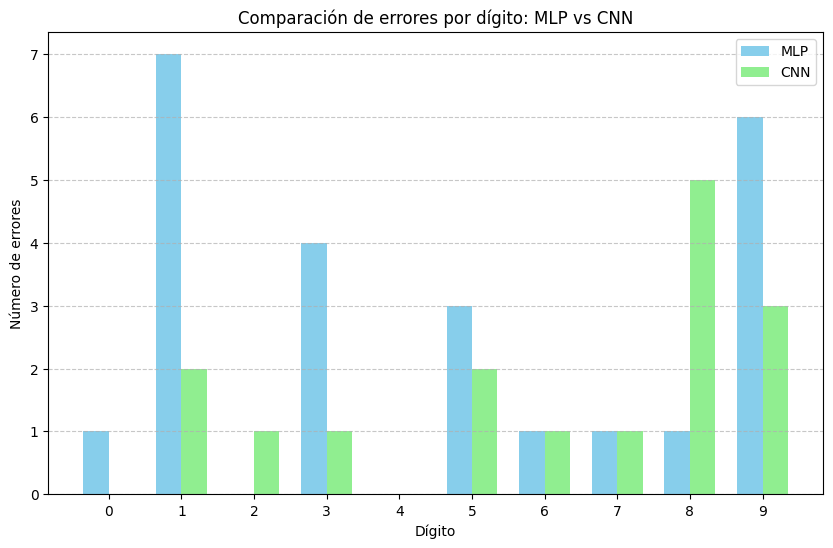

In [ ]:
#  C√≥digo para la gr√°fica de barras:

import matplotlib.pyplot as plt
import numpy as np

# Ya tenemos estos datos de antes:
# errores_por_clase_mlp
# errores_por_clase_cnn

d√≠gitos = np.arange(10)

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Barras para MLP
plt.bar(d√≠gitos - bar_width/2, errores_por_clase_mlp, width=bar_width, label='MLP', color='skyblue')

# Barras para CNN
plt.bar(d√≠gitos + bar_width/2, errores_por_clase_cnn, width=bar_width, label='CNN', color='lightgreen')

# Est√©tica
plt.xlabel('D√≠gito')
plt.ylabel('N√∫mero de errores')
plt.title('Comparaci√≥n de errores por d√≠gito: MLP vs CNN')
plt.xticks(d√≠gitos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# üîç Interpretaci√≥n visual:
* Si la barra verde (CNN) es m√°s baja que la azul (MLP), significa que la CNN mejora en ese d√≠gito.

* Si la barra verde y azul est√°n muy juntas, no hubo mucha mejora.

* Si alguna verde es m√°s alta (raro), all√≠ la CNN empeor√≥.